In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame, Series

%matplotlib inline

In [2]:
np.random.seed(20170117)

n0, mu0, variance0  = 20, [10, 11], 20
data0 = multivariate_normal(mu0, np.eye(2) * variance0, n0)
df0 = DataFrame(data0, columns=['x1', 'x2'])
df0['t'] = 0

n1, mu1, variance1 = 15, [18, 20], 22
data1 = multivariate_normal(mu1, np.eye(2) * variance1, n1)
df1 = DataFrame(data1, columns=['x1', 'x2'])
df1['t'] = 1

df = pd.concat([df0, df1], ignore_index = True)
train_set = df.reindex(permutation(df.index)).reset_index(drop=True)

In [3]:
train_set

,x1,x2,t
0,9.661245,11.272401,0
1,31.320058,17.184510,1
2,17.974722,22.243375,1
3,18.698876,16.169865,0
4,-0.053059,16.555723,0
5,22.925658,20.668854,1
6,11.397703,14.007031,0
7,9.188209,1.883351,0
8,19.888201,15.548986,1
9,6.499636,21.542848,0


In [4]:
train_x = train_set[['x1', 'x2']].as_matrix()
train_t = train_set['t'].as_matrix().reshape([len(train_set), 1])

In [5]:
x = tf.placeholder(tf.float32, [None, 2])
w = tf.Variable(tf.zeros([2, 1]))
w0 = tf.Variable(tf.zeros([1]))
f = tf.matmul(x, w) + w0
p = tf.sigmoid(f)

In [6]:
t = tf.placeholder(tf.float32, [None, 1])
loss = -tf.reduce_sum(t * tf.log(p) + (1-t) * tf.log(1 - p))
train_step = tf.train.AdamOptimizer().minimize(loss)

In [7]:
correct_predicition = tf.equal(tf.sign(p - 0.5), tf.sign(t - 0.5))
accuracy = tf.reduce_mean(tf.cast(correct_predicition, tf.float32))

In [8]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [9]:
i = 0
for _ in range(20000):
    i += 1
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    if i % 2000 == 0:
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={x:train_x, t:train_t})
        print ('Step: %d, Loss: %f, Accuracy: %f' % (i, loss_val, acc_val))

Step: 2000, Loss: 17.044117, Accuracy: 0.885714
Step: 4000, Loss: 13.209496, Accuracy: 0.885714
Step: 6000, Loss: 10.901573, Accuracy: 0.914286
Step: 8000, Loss: 9.480859, Accuracy: 0.914286
Step: 10000, Loss: 8.619801, Accuracy: 0.914286
Step: 12000, Loss: 8.125425, Accuracy: 0.914286
Step: 14000, Loss: 7.872520, Accuracy: 0.914286
Step: 16000, Loss: 7.771931, Accuracy: 0.914286
Step: 18000, Loss: 7.750442, Accuracy: 0.914286
Step: 20000, Loss: 7.749572, Accuracy: 0.914286


In [10]:
w0_val, w_val = sess.run([w0, w])
w0_val, w1_val, w2_val = w0_val[0], w_val[0][0], w_val[1][0]
print (w0_val, w1_val, w2_val)

-12.697 0.409635 0.40327


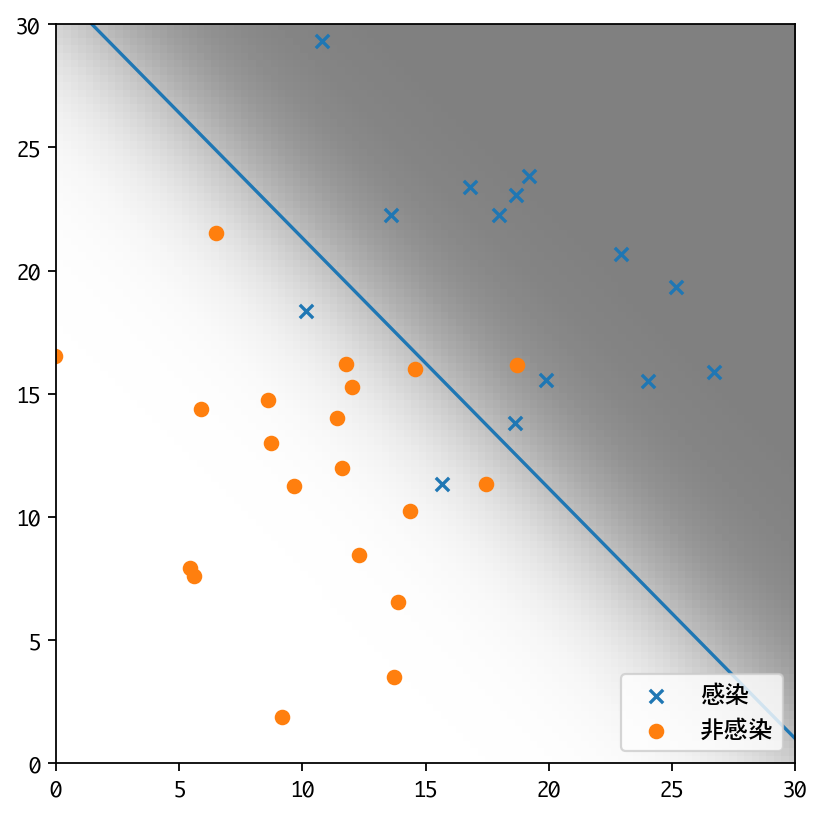

In [11]:
train_set0 = train_set[train_set['t'] == 0]
train_set1 = train_set[train_set['t'] == 1]

fig = plt.figure(figsize=(6, 6))
subplot = fig.add_subplot(1, 1, 1)
subplot.set_ylim([0, 30])
subplot.set_xlim([0, 30])
subplot.scatter(train_set1.x1, train_set1.x2, marker = 'x', label='感染')
subplot.scatter(train_set0.x1, train_set0.x2, marker = 'o', label='非感染')

subplot.legend(loc="lower right")

linex = np.linspace(0, 30, 10)
liney = - (w1_val * linex / w2_val + w0_val / w2_val)
subplot.plot(linex, liney)

field = [[(1 / (1 + np.exp(-(w0_val + w1_val * x1 + w2_val * x2)))) for x1 in np.linspace(0, 30, 100)] for x2 in np.linspace(0, 30, 100)]
subplot.imshow(field, origin='lower', extent=(0, 30, 0, 30), cmap = plt.cm.gray_r, alpha = 0.5)